### Predictive Insights from Portuguese Bank Marketing Data 

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the cleaned data
data_bank = pd.read_csv('data_bank.csv')

In [3]:
# Basic Data Exploration
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,0


In [4]:
data_bank.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,857.565283,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,303.245691,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,999.000000,275.000000,1.000000


In [5]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
print(data_bank['target'].dtype)

int64


In [7]:
data_bank['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

 ### Input variables:
 
#### Bank client data:
 1. age (numeric)
 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 4. education (categorical: "unknown","secondary","primary","tertiary")
 5. default: has credit in default? (binary: "yes","no")
 6. balance: average yearly balance, in euros (numeric) 
 7. housing: has housing loan? (binary: "yes","no")
 8. loan: has personal loan? (binary: "yes","no")
 
#### Related with the last contact of the current campaign:
 9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
 10. day: last contact day of the month (numeric)
 11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12. duration: last contact duration, in seconds (numeric)
 
#### Other attributes:
 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)
 15. previous: number of contacts performed before this campaign and for this client (numeric)
 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
 17. target (y) - has the client subscribed a term deposit? (binary: "yes","no")

### Univariate Analysis:

Bar plots for categorical variables to understand their distributions.

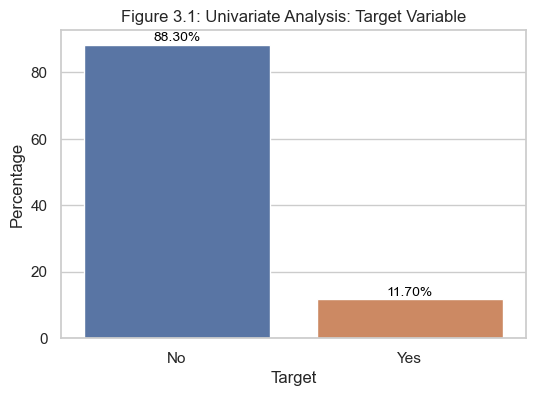

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Calculate the percentage of subscribers ('yes') in the 'target' variable
target_percentages = data_bank['target'].value_counts(normalize=True) * 100

# Create a bar plot for the 'target' variable with percentage labels
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_percentages.index, y=target_percentages.values)
plt.title("Figure 3.1: Univariate Analysis: Target Variable")
plt.xlabel("Target")
plt.ylabel("Percentage")
plt.xticks([0, 1], ['No', 'Yes'])  # Customize x-axis tick labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig('target_univariate_percentage.png', bbox_inches='tight')  # Save the plot as PNG
plt.show()


Figure 3.1: The univariate analysis of the target variable reveals a substantial class imbalance. The majority of instances have a 'no' value, accounting for 88.30% of the dataset, while the 'yes' value represents only 11.7%. This disparity suggests that the dataset is skewed towards negative outcomes in the campaign response, which could potentially impact the performance of predictive models built on this data.

In [10]:
job_subs = pd.DataFrame(data_bank.groupby('job')['target'].mean().reset_index())

In [11]:
type(job_subs)

pandas.core.frame.DataFrame

In [12]:
job_subs.columns

Index(['job', 'target'], dtype='object')

In [13]:
job_subs.head()

,job,target
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556


## job vs target

In [58]:
group_df = data_bank[['job','target']].groupby('job', as_index=False).mean()

job    target      
                       mean count
0          admin.  0.122027  5171
1     blue-collar  0.072750  9732
2    entrepreneur  0.082717  1487
3       housemaid  0.087903  1240
4      management  0.137556  9458
5           other  0.118056   288
6         retired  0.227915  2264
7   self-employed  0.118429  1579
8        services  0.088830  4154
9         student  0.286780   938
10     technician  0.110570  7597
11     unemployed  0.155027  1303

In [57]:
pd.merge(left=group_df.set_index('job'), right=data_bank.groupby('job')['target'].count().rename('n'), left_index=True, right_index=True)

,target,n
job,,
admin.,0.122027,5171
blue-collar,0.072750,9732
entrepreneur,0.082717,1487
housemaid,0.087903,1240
management,0.137556,9458
other,0.118056,288
retired,0.227915,2264
self-employed,0.118429,1579
services,0.088830,4154


In [54]:
data_bank.groupby('job')['target'].count().rename('n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
other             288
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: n, dtype: int64

In [14]:
def calc_moe(col):
    group_df = pd.DataFrame(data_bank.groupby(col)['target'].mean().reset_index())
    #calculate n
    group_df = group_df.set_index(col).merge(data_bank.groupby(col)['target'].count().rename('n'), left_index=True, right_index=True)
    #calc moe: MOE = 1.96 * sqrt(p * (1 - p) / n), where p is the subscription rate and n is the number of observations.
    group_df['moe'] = 1.96*np.sqrt(group_df['target']*(1-group_df['target'])/group_df['n'])
    return group_df.reset_index().sort_values('target', ascending=False)

calc_moe('job')

,job,target,n,moe
9,student,0.286780,938,0.028943
6,retired,0.227915,2264,0.017280
11,unemployed,0.155027,1303,0.019652
4,management,0.137556,9458,0.006942
0,admin.,0.122027,5171,0.008921
7,self-employed,0.118429,1579,0.015938
5,other,0.118056,288,0.037267
10,technician,0.110570,7597,0.007052
8,services,0.088830,4154,0.008652
3,housemaid,0.087903,1240,0.015760


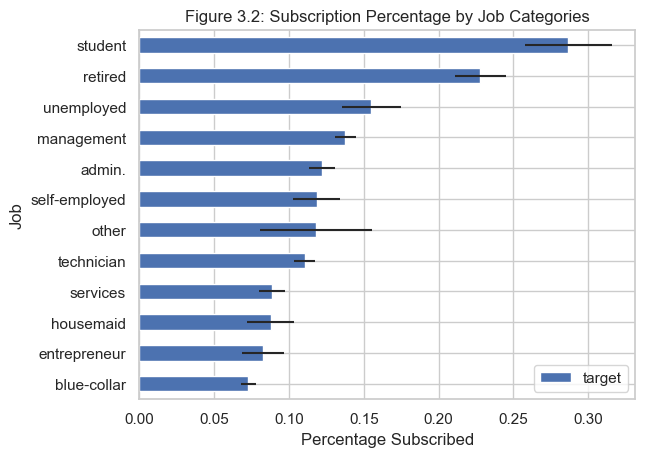

In [15]:
def plot_w_errorbars(df, col):
    df[[col,'target']].set_index(col).sort_values('target',ascending=True).plot.barh(xerr=df['moe'].values[::-1])
    
plot_w_errorbars(calc_moe('job'), 'job')

# Set the title and labels
plt.title('Figure 3.2: Subscription Percentage by Job Categories')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Job')

# Save the plot as PNG
plt.savefig('subscription_by_job.png')

Figure 3.2: The distribution of subscription percentages across different job categories offers intriguing insights. Notably, students and retirees demonstrate the highest subscription rates, standing at 28.68% and 22.79% respectively. Among other categories, management shows a significant subscription rate of 13.76%, followed by entrepreneurs at 8.27%, and blue-collar workers at 7.27%. These variations in subscription rates provide valuable clues about the relationship between occupation and campaign success.

## fig 3.3: education vs target

In [16]:
calc_moe('education')

,education,target,n,moe
3,tertiary,0.150064,13301,0.006069
0,other,0.135703,1857,0.015577
2,secondary,0.105594,23202,0.003954
1,primary,0.086265,6851,0.006648


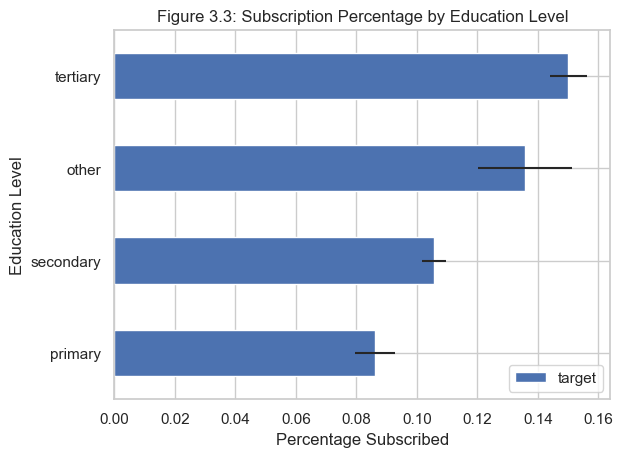

In [17]:
plot_w_errorbars(calc_moe('education'), 'education')

# Set the title and labels
plt.title('Figure 3.3: Subscription Percentage by Education Level')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Education Level')

# Save the plot as PNG
plt.savefig('subscription_by_education.png')

Figure 3.3: The bar chart depicting the subscription percentage by education level provides valuable insights into the relationship between education and the campaign's outcome. From the visualization, we observe the following patterns: tertiary education, which encompasses advanced degrees from universities and colleges, shows the highest subscription rate of 15.01%, followed by other education at 13.57%, secondary education at 10.56%, and primary education at 8.63%. This suggests that clients with tertiary education tend to show a higher subscription rate in comparison to other education levels.

## fig 3.4: marital status vs target

In [18]:
calc_moe('marital')

,marital,target,n,moe
2,single,0.149492,12790,0.006180
0,divorced,0.119455,5207,0.008809
1,married,0.101235,27214,0.003584


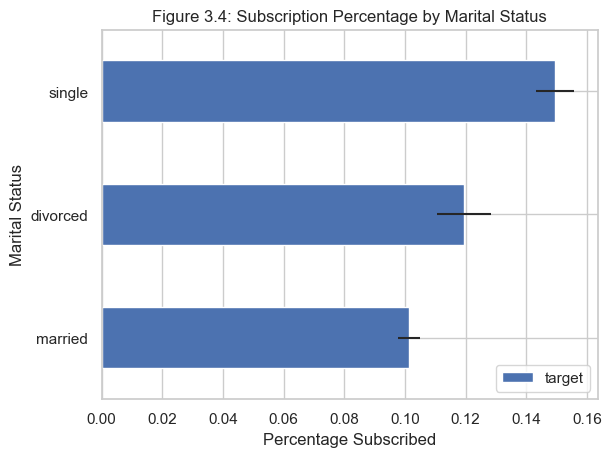

In [19]:
plot_w_errorbars(calc_moe('marital'), 'marital')

# Set the title and labels
plt.title('Figure 3.4: Subscription Percentage by Marital Status')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Marital Status')

# Save the plot as PNG
plt.savefig('subscription_by_marital.png')

Figure 3.4 shows the  subscription percentage by marital status: Single individuals exhibit the highest subscription rate at 14.95%, followed by divorced individuals with a rate of 11.95%, while married individuals have a subscription rate of 10.12%.

## fig 3.5: housing vs target

In [20]:
calc_moe('housing')

,housing,target,n,moe
0,no,0.167024,20081,0.005159
1,yes,0.077000,25130,0.003296


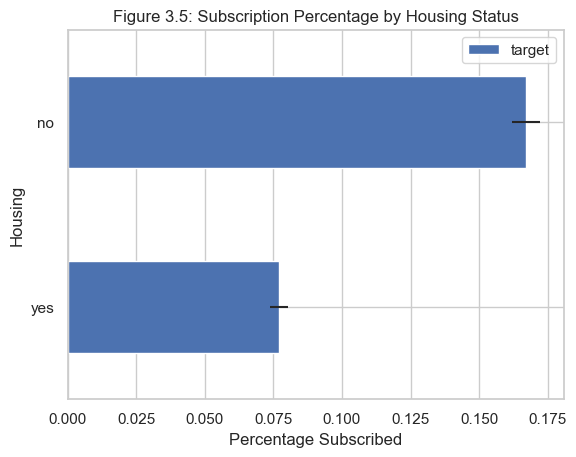

In [21]:
plot_w_errorbars(calc_moe('housing'), 'housing')

# Set the title and labels
plt.title('Figure 3.5: Subscription Percentage by Housing Status')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Housing')

# Save the plot as PNG
plt.savefig('subscription_by_housing.png')

Figure 3.5: The analysis of subscription percentages with respect to housing and loan variables reveals interesting insights. Among those who do not own a house, a substantial 16.70% have subscribed to the bank's campaign, indicating a potentially higher engagement level compared to homeowners, where the subscription rate is notably lower at 7.7%. 

## fig 3.6: loan vs target

In [22]:
calc_moe('loan')

,loan,target,n,moe
0,no,0.126557,37967,0.003344
1,yes,0.066814,7244,0.005750


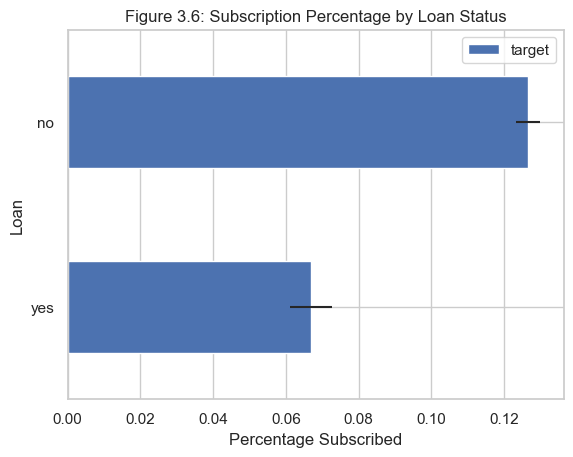

In [23]:
plot_w_errorbars(calc_moe('loan'), 'loan')

# Set the title and labels
plt.title('Figure 3.6: Subscription Percentage by Loan Status')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Loan')

# Save the plot as PNG
plt.savefig('subscription_by_loan.png')

Figure 3.6: Similarly, the relationship between loan status and subscription is pronounced. A noteworthy 12.66% of individuals without an existing loan have subscribed to the campaign, showcasing a higher inclination towards engagement. On the contrary, only 6.68% of those with a loan opted for subscription, suggesting a lower response rate among loan holders. These observations underscore the potential influence of housing and loan status on campaign subscription, emphasizing the need for further exploration and tailored marketing strategies for different customer segments.

## fig 3.7: age vs target

In [24]:
# Convert 'age' variable to categorical
data_bank['age_category'] = pd.cut(data_bank['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Display the updated DataFrame
print(data_bank[['age', 'age_category']].head())


   age age_category
0   58        56-65
1   44        36-45
2   33        26-35
3   47        46-55
4   33        26-35


In [25]:
calc_moe('age_category')

,age_category,target,n,moe
5,66+,0.426099,751,0.035368
0,18-25,0.239521,1336,0.022886
4,56-65,0.141239,4149,0.010597
1,26-35,0.120031,15571,0.005105
2,36-45,0.093894,13856,0.004857
3,46-55,0.093527,9548,0.005840


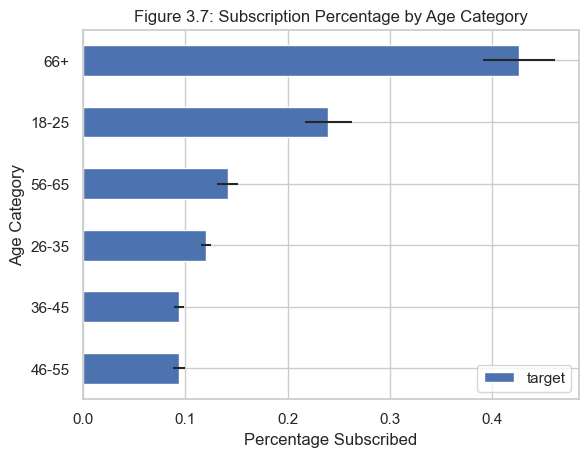

In [26]:
plot_w_errorbars(calc_moe('age_category'), 'age_category')

# Set the title and labels
plt.title('Figure 3.7: Subscription Percentage by Age Category')
plt.xlabel('Percentage Subscribed')
plt.ylabel('Age Category')

# Save the plot as PNG
plt.savefig('subscription_by_age.png')

Figure 3.7: The bar chart depicting the subscription percentages across different age categories provides valuable insights into the relationship between age and campaign outcome. Notably, clients in the age bucket of 66 and above show the highest subscription rate of 42.61%, followed closely by the 18-25 age category at 23.95%. Conversely, the lowest subscription rates are observed in the age buckets of 36-45 and 46-55, with percentages of 9.39% and 9.35% respectively. This observation aligns with our earlier findings, where students, individuals with higher education levels, and retirees exhibited higher subscription rates.

### Bivariate Analysis

Bivariate analysis involves exploring the relationship between two variables in a dataset. It helps us understand how changes in one variable affect another and whether there are any patterns, correlations, or trends between the variables.

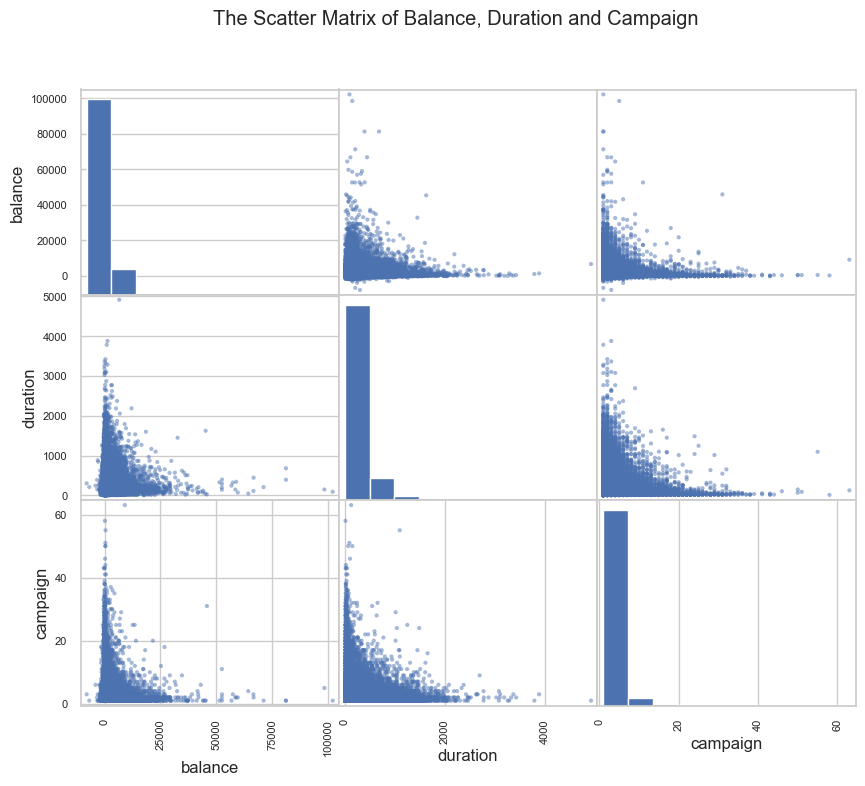

In [28]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(data_bank[['balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Balance, Duration and Campaign')
plt.savefig('scatter_matrix .png', bbox_inches='tight')
plt.show()

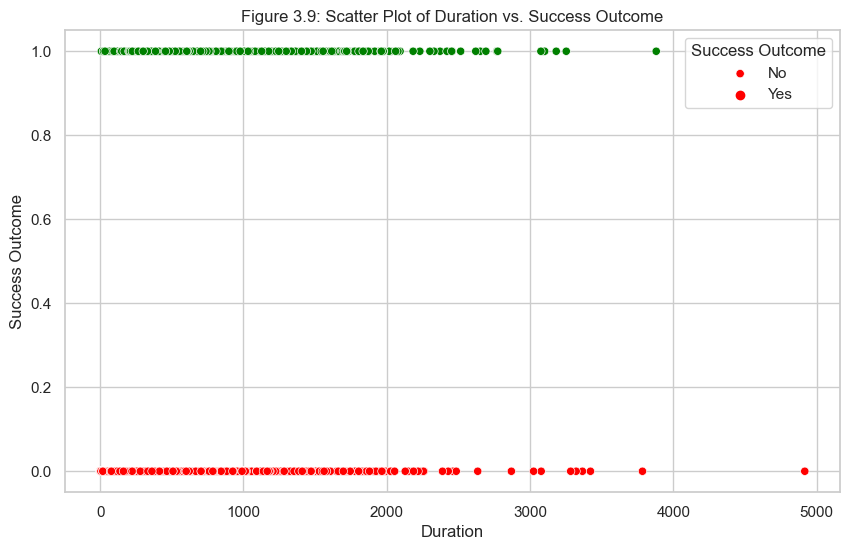

In [29]:
# Scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_bank, x='duration', y='target', hue='target', palette={0: 'red', 1: 'green'})
plt.title('Figure 3.9: Scatter Plot of Duration vs. Success Outcome')
plt.xlabel('Duration')
plt.ylabel('Success Outcome')
plt.legend(title='Success Outcome', labels=['No', 'Yes'])

plt.savefig('duration_vs_success.png')
plt.show()


### Correlation matrix

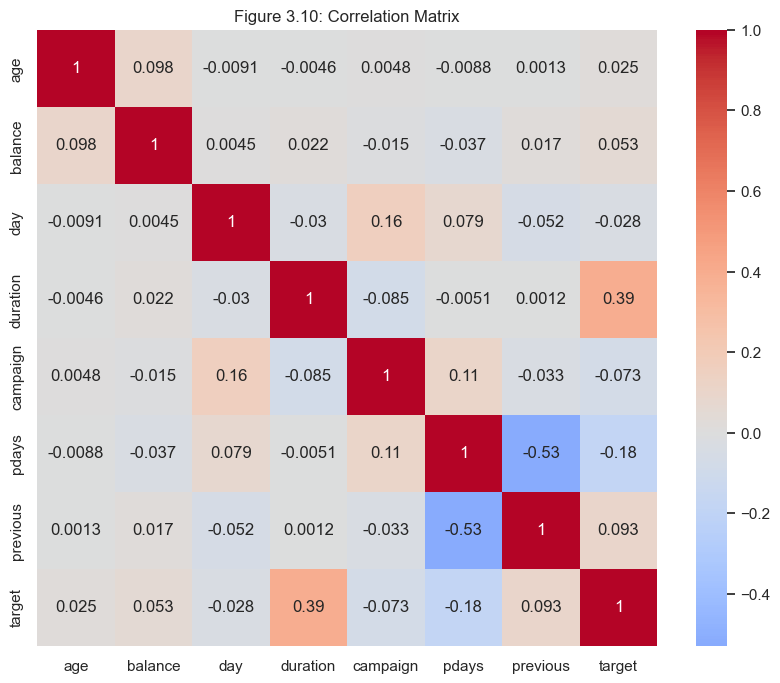

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data_bank.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Set the title
plt.title("Figure 3.10: Correlation Matrix")

# Save the figure as a PNG file
plt.savefig("correlation_matrix.png")

# Show the plot
plt.show()


Feature importances

### Inferential statistics:

### Statistical tests: 

### T-test

In [31]:
from scipy.stats import ttest_ind

continuous_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
significance_level = 0.05  # Adjust this based on your significance level

t_test_results = []

for column in continuous_columns:
    subscribed = data_bank[data_bank['target'] == 1][column]
    not_subscribed = data_bank[data_bank['target'] == 0][column]
    
    t_statistic, p_value = ttest_ind(subscribed, not_subscribed)
    
    if p_value < significance_level:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    
    p_value_readable = format(p_value, '.2f')  # Format p-value to 2 decimal places
    t_statisticreadable = format(t_statistic, '.2f')  # Format p-value to 2 decimal places
    
    t_test_results.append((column, t_statisticreadable, p_value_readable, significance))

t_test_df = pd.DataFrame(t_test_results, columns=['Variable', 'T-Statistic', 'P-Value', 'Significance'])

# Save the results as a table
t_test_df.to_csv('t_test_results.csv', index=False)

print(t_test_df)


   Variable T-Statistic P-Value Significance
0   balance       11.25    0.00  Significant
1       day       -6.03    0.00  Significant
2  duration       91.29    0.00  Significant
3  campaign      -15.60    0.00  Significant
4     pdays      -38.66    0.00  Significant
5  previous       19.91    0.00  Significant


### Chi-squared Test

In [33]:
import pandas as pd
import scipy.stats as stats

# List of categorical input variables
categorical_vars = ['age_category', 'job', 'marital', 'education', 'housing', 'poutcome', 
                    'contact','default', 'balance', 'loan', 'month']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Variable', 'Chi-Square', 'P-Value', 'Significant'])

# Loop through each categorical variable and perform chi-squared test
for var in categorical_vars:
    contingency_table = pd.crosstab(data_bank[var], data_bank['target'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Compare p-value with significance level (alpha)
    alpha = 0.05
    significant = p < alpha
    
    results = results.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant}, ignore_index=True)

# Save the results as a table
results.to_csv('chi_squared_results.csv', index=False)

print(results)


/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square':

        Variable  Chi-Square  P-Value Significant
0   age_category     1036.27      0.0        True
1            job      836.11      0.0        True
2        marital      196.50      0.0        True
3      education      238.92      0.0        True
4        housing      874.82      0.0        True
5       poutcome     4295.47      0.0        True
6        contact     1035.71      0.0        True
7        default       22.20      0.0        True
8        balance     9967.66      0.0        True
9           loan      209.62      0.0        True
10         month     3061.84      0.0        True


/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_21644/2393469054.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square':